<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>


# Machine Learning Avanzado: Laboratorio 02

<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>
    
**Nombre Estudiante(s)**:  
- Cesar Soto
- Cristhian Solís
- Cristian Vasquez


## Introducción  

En este laboratirio se busca aplicar y comparar diferentes técnicas de redes neuronales para abordar un problema de clasificación binaria utilizando el conjunto de datos **"Chihuahuas vs Muffins"**. Este desafío permite explorar el diseño y evaluación de modelos, destacando el uso de redes neuronales convolucionales (CNNs) frente a un Perceptrón Multicapa (MLP). A través de esta comparación, se analizarán las capacidades de las CNNs para identificar patrones visuales complejos.

## Objetivo:

- Comparar el desempeño de un modelo de Perceptrón Multicapa (MLP) con redes convolucionales (CNNs).  
- Diseñar y evaluar tres arquitecturas diferentes de redes convolucionales.  
- Analizar las métricas de rendimiento y justificar las diferencias observadas entre los modelos.  
- Presentar los resultados de manera estructurada en un informe técnico en formato Jupyter Notebook.

## Marco metodológico

En el marco de este laboratorio, se desarrollaron actividades secuenciales que determinaron el marco metodológico guiando el desarrollo del laboratorio:
1. Carga y Preprocesamiento de datos
2. Desarrollo Modelo Perceptrón Multicapa (MLP) 
3. Desarrollo Modelo Red Neuronal Convolucional (CNN)
4. Comparación de modelos
5. Conclusiones

## 1.- Carga y Preprocesamiento de datos

Se realiza la importación de las librerías necesarias, la carga del dataset "Chihuahuas vs Muffins" de Kaggle, y se aplican técnicas de preprocemaiento de las imagenes

#### Librerias

Se importan las librerías principales de TensorFlow para el procesamiento de imágenes y el desarrollo de modelos de redes neuronales, junto con otras librerías complementarias necesarias para la implementación y análisis del proyecto.

In [1]:
# Importación de librerías
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter

# TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization


#### Carga del dataset y preparación de los datos de entrenamiento y prueba

Se carga el dataset de Kaggle con parámetros específicos para imágenes y lotes, normalizando los píxeles y respetando la separación en conjuntos de entrenamiento y prueba desde el origen.

In [2]:
# Parámetros
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Rutas a las carpetas de datos
TRAIN_PATH = r"C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\04_Machine_Learning\Laboratorios\Data\archive (6)\train"
TEST_PATH = r"C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\04_Machine_Learning\Laboratorios\Data\archive (6)\test"
# Generador de datos con normalización
datagen = ImageDataGenerator(rescale=1.0/255)

# Cargar datos de entrenamiento y prueba 
train_data = datagen.flow_from_directory(
    directory=TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary')

test_data = datagen.flow_from_directory(
    directory=TEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary')

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


In [3]:
# Verificación de las imágenes normalizadas
images, labels = next(iter(train_data))
print(f"Rango de valores normalizados: Min = {images.min()}, Max = {images.max()}")


Rango de valores normalizados: Min = 0.0, Max = 1.0


#### Visualización de un batch

Se selecciona y visualiza una muestra de un batch aleatorio del conjunto de entrenamiento para mostrar cómo se cargan y procesan las imágenes antes de ser utilizadas en la predicción.



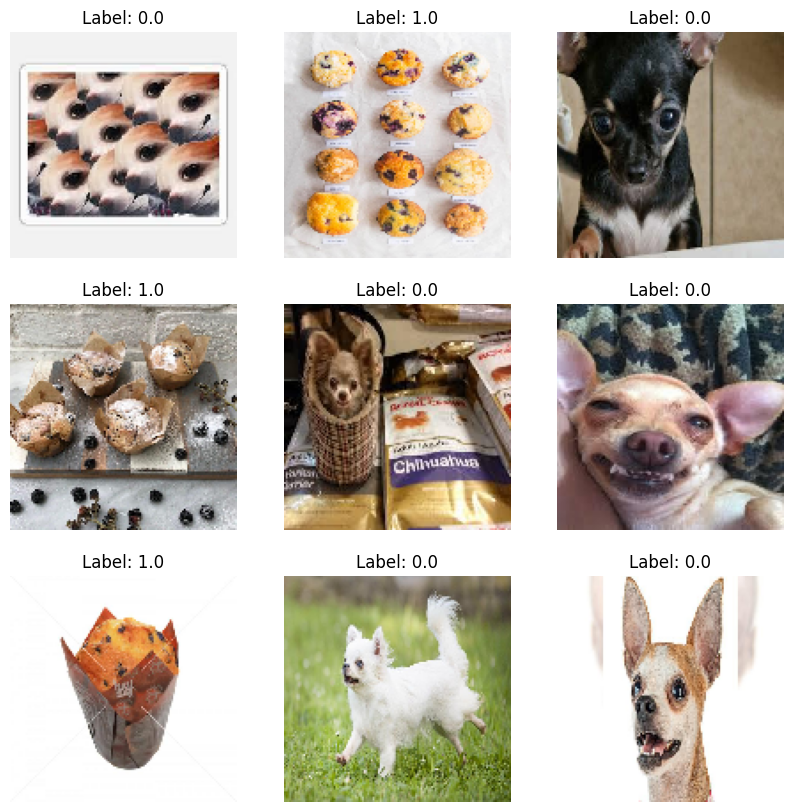

In [4]:
def visualize_batch(data):
    # Obtener un lote de imágenes y etiquetas
    images, labels = next(iter(data))  # Convertir el dataset en iterador y obtener el siguiente batch

    # Crear una cuadrícula de 3x3 para mostrar imágenes
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  # Mostrar la imagen
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')  # Desactivar ejes
    plt.show()

# Visualizar un batch de imágenes del dataset de entrenamiento
visualize_batch(train_data)

#### Distribución de las Clases
Se visualiza la distribución de las clases para observar el balance de las clases y su representación en el dataset

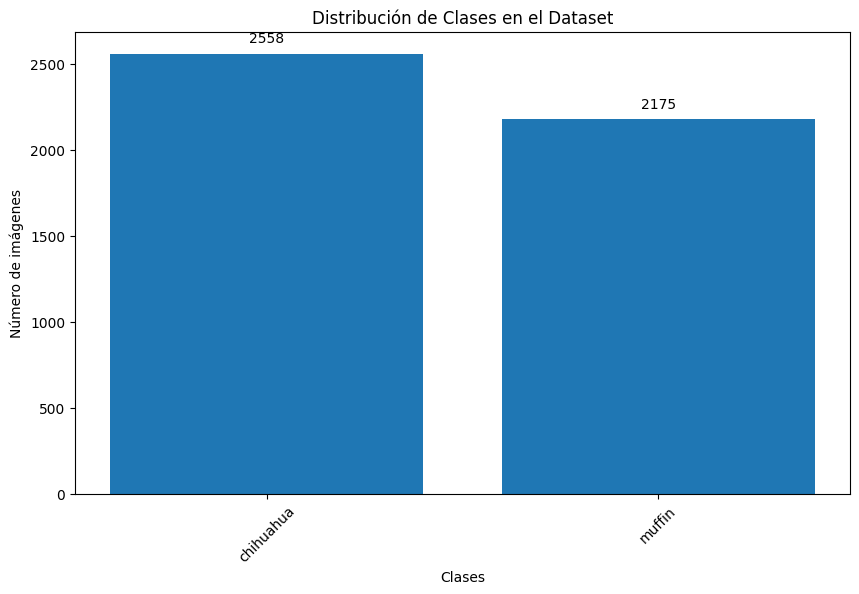

In [5]:
# Obtener los índices de las clases desde train_data
class_indices = train_data.class_indices
# Invertir el diccionario para obtener los nombres de las clases
class_names = {v: k for k, v in class_indices.items()}

# Crear una lista para los índices de clase
class_indices_list = []

# Iterar sobre el dataset para extraer las etiquetas y obtener los índices de clase
for images, labels in train_data:
    class_indices_list.extend(labels)  # Añadir las etiquetas (0 o 1) a la lista
    if len(class_indices_list) >= len(train_data.filenames):  # Termina cuando se procesan todas las imágenes
        break

# Contar la frecuencia de cada clase
class_counts = Counter(class_indices_list)

# Graficar la distribución de clases
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names.values(), [class_counts[i] for i in range(len(class_names))])

# Añadir los totales sobre las barras
for bar, count in zip(bars, [class_counts[i] for i in range(len(class_names))]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel('Clases')
plt.ylabel('Número de imágenes')
plt.title('Distribución de Clases en el Dataset')
plt.xticks(rotation=45)
plt.show()



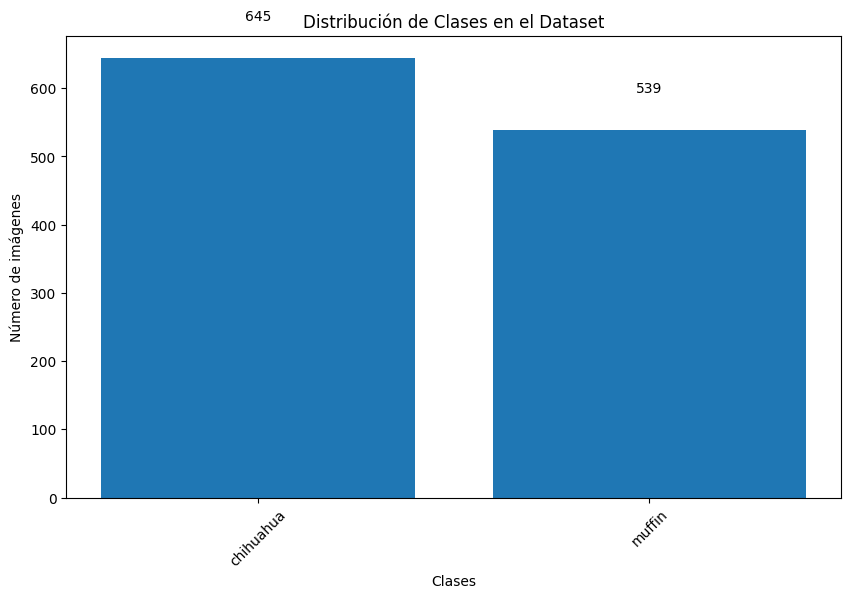

In [28]:
# Obtener los índices de las clases desde test_data
class_indices = test_data.class_indices
# Invertir el diccionario para obtener los nombres de las clases
class_names = {v: k for k, v in class_indices.items()}

# Crear una lista para los índices de clase
class_indices_list = []

# Iterar sobre el dataset para extraer las etiquetas y obtener los índices de clase
for images, labels in test_data:
    class_indices_list.extend(labels)  # Añadir las etiquetas (0 o 1) a la lista
    if len(class_indices_list) >= len(test_data.filenames):  # Termina cuando se procesan todas las imágenes
        break

# Contar la frecuencia de cada clase
class_counts = Counter(class_indices_list)

# Graficar la distribución de clases
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names.values(), [class_counts[i] for i in range(len(class_names))])

# Añadir los totales sobre las barras
for bar, count in zip(bars, [class_counts[i] for i in range(len(class_names))]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel('Clases')
plt.ylabel('Número de imágenes')
plt.title('Distribución de Clases en el Dataset')
plt.xticks(rotation=45)
plt.show()


## 2.- Desarrollo Modelo Perceptrón Multicapa (MLP) 

El modelo MLP diseñado está estructurado para clasificación binaria con imágenes de tamaño moderado. Usa capas densas con activación **ReLU** y regularización **Dropout** para mitigar el sobreajuste y finaliza con la función de activación **sigmoid** en la capa de salida enfocado para tareas de clasificación binaria. 

In [6]:
# Crear modelo MLP
def create_mlp(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),         # Convierte imágenes 2D en vectores 1D
        Dense(256, activation='relu'),           # Capa completamente conectada
        Dropout(0.3),                            # Regularización para evitar sobreajuste
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid') ])         # Capa de salida para clasificación binaria
    
    model.compile(
        optimizer='adam',                        # Optimizador Adam
        loss='binary_crossentropy',             # Pérdida para clasificación binaria
        metrics=['accuracy']                    # Métrica de precisión
    )
    return model

# Crear y visualizar el modelo MLP
mlp_model = create_mlp((128, 128, 3))  # Tamaño de entrada: imágenes redimensionadas a 128x128 con 3 canales
mlp_model.summary()                   # Resumen del modelo



c:\Users\csolis\AppData\Local\anaconda3\envs\mi_entorno\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,583,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,616,193 (48.13 MB)

 Trainable params: 12,616,193 (48.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Entrenar el modelo MLP
mlp_history = mlp_model.fit(
    train_data,  # Conjunto de entrenamiento
    validation_data=test_data,  # Conjunto de prueba
    epochs=10,  # Número de épocas
    verbose=1  # Imprimir progreso
)

c:\Users\csolis\AppData\Local\anaconda3\envs\mi_entorno\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 56s 374ms/step - accuracy: 0.5291 - loss: 5.7705 - val_accuracy: 0.5405 - val_loss: 0.6631
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 59s 402ms/step - accuracy: 0.5466 - loss: 0.6895 - val_accuracy: 0.5405 - val_loss: 0.6904
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 60s 403ms/step - accuracy: 0.5306 - loss: 0.6914 - val_accuracy: 0.5405 - val_loss: 0.6897
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 45s 300ms/step - accuracy: 0.5453 - loss: 0.6889 - val_accuracy: 0.5405 - val_loss: 0.6895
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 46s 310ms/step - accuracy: 0.5241 - loss: 0.6918 - val_accuracy: 0.5405 - val_loss: 0.6887
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 42s 280ms/step - accuracy: 0.5474 - loss: 0.6877 - val_accuracy: 0.5405 - val_loss: 0.6906
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 41s 274ms/step - accuracy: 0.5393 - loss: 0.6883 - val_accuracy: 0.5405 - val_loss: 0.6899
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 41s 275ms/step - accuracy: 0.5487 - loss: 0

#### Arquitectura del Modelo MLP (Perceptrón Multicapa)
##### Detalle de las capas:

- **Capa de Entrada - Flatten**  
  Convierte las imágenes 2D (128x128) en vectores 1D para ser procesadas por capas densas. La salida es un vector de 49152 elementos (producto de las dimensiones de la imagen: 128 * 128 * 3).

- **Capa Densa - Dense (256 neuronas, ReLU)**  
  Capa densa totalmente conectada con 256 neuronas y función de activación **ReLU** para introducir no linealidades, permitiendo al modelo aprender representaciones más complejas de los datos. Esta capa necesita aprender de 12,583,168 parámetros.

- **Capa Dropout**  
  Regularización para prevenir el sobreajuste, apagando aleatoriamente el 30% de las neuronas durante el entrenamiento.

- **Capa Densa - Dense (128 neuronas, ReLU)**  
  Capa densa con 128 neuronas y activación **ReLU** para reducir la dimensionalidad de las características, manteniendo la capacidad de aprender patrones complejos.

- **Capa Dropout**  
  Aplicación adicional de regularización **Dropout** con la misma tasa para prevenir el sobreajuste en la segunda capa densa.

- **Capa de Salida - 1 Neurona (Sigmoid)**  
  Capa de salida con una única neurona y activación **sigmoide** para clasificación binaria, produciendo una probabilidad entre 0 y 1.



In [9]:
# Guardar el modelo MLP entrenado
mlp_model.save('mlp_model.keras')

## 3.- Desarrollo Modelo Red Neuronal Convolucional (CNN)

El modelo CNN diseñado está estructurado para clasificación binaria con imágenes de tamaño moderado (128x128x3). Comienza con varias capas convolucionales que extraen características de las imágenes mediante la activación **ReLU** y la normalización de lotes (**BatchNormalization**), seguida de capas de **MaxPooling** para reducir la dimensionalidad. Después, el modelo pasa por capas densas con activación **ReLU** y regularización **Dropout** para prevenir el sobreajuste. La capa de salida utiliza la función de activación **sigmoid**, apara el mismo objetivo de clasificación binaria


In [10]:
# Crear modelo CNN
def create_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),  # Primera capa convolucional
        MaxPooling2D(pool_size=(2, 2)),                                  # Reducción de dimensionalidad
        BatchNormalization(),                                           # Normalización

        Conv2D(64, (3, 3), activation='relu'),                          # Segunda capa convolucional
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(128, (3, 3), activation='relu'),                         # Tercera capa convolucional
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),                                                      # Aplanar para capas densas
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')                                  # Capa de salida
    ])
    
    # Compilar el modelo
    model.compile(
        optimizer='adam', # Optimizador Adam
        loss='binary_crossentropy',  # Función de pérdida para clasificación multiclase
        metrics=['accuracy']# Métrica de precisión
    )
    return model

# Crear y visualizar el modelo CNN
cnn_model = create_cnn((128, 128, 3))
cnn_model.summary()  # Resumen del modelo

c:\Users\csolis\AppData\Local\anaconda3\envs\mi_entorno\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,549,953 (24.99 MB)

 Trainable params: 6,549,505 (24.98 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
# Entrenar el modelo CNN
cnn_history = cnn_model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    verbose=1
)


Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 74s 482ms/step - accuracy: 0.7167 - loss: 2.1902 - val_accuracy: 0.5405 - val_loss: 1.8792
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 64s 428ms/step - accuracy: 0.7851 - loss: 0.9589 - val_accuracy: 0.5481 - val_loss: 0.7229
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 70s 474ms/step - accuracy: 0.8188 - loss: 0.5508 - val_accuracy: 0.7407 - val_loss: 0.4859
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 82s 556ms/step - accuracy: 0.8558 - loss: 0.3626 - val_accuracy: 0.8074 - val_loss: 0.4131
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 69s 463ms/step - accuracy: 0.8836 - loss: 0.3244 - val_accuracy: 0.8091 - val_loss: 0.4035
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 79s 536ms/step - accuracy: 0.8966 - loss: 0.2725 - val_accuracy: 0.8632 - val_loss: 0.3466
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 69s 465ms/step - accuracy: 0.9089 - loss: 0.2540 - val_accuracy: 0.8818 - val_loss: 0.2688
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 64s 436ms/step - accuracy: 0.9200 - loss: 0

#### Arquitectura del Modelo CNN (Red Neuronal Convolucional)

##### Detalle de las capas:
- **Capa Conv2D (32 filtros, tamaño 3x3, ReLU)**  
  Primera capa convolucional que extrae características espaciales de las imágenes de entrada.

- **MaxPooling2D (2x2)**  
  Reducción de dimensionalidad mediante la operación de agrupamiento.

- **BatchNormalization**  
  Normalización de lotes para mejorar la convergencia y la estabilidad del entrenamiento.

- **Capa Conv2D (64 filtros, tamaño 3x3, ReLU)**  
  Segunda capa convolucional que extrae características más complejas.

- **MaxPooling2D (2x2)**  
  Reducción de dimensionalidad para las características extraídas.

- **BatchNormalization**  
  Normalización adicional para mejorar la eficiencia del modelo.

- **Capa Conv2D (128 filtros, tamaño 3x3, ReLU)**  
  Tercera capa convolucional para extraer características de alto nivel.

- **MaxPooling2D (2x2)**  
  Reducción de dimensionalidad.

- **BatchNormalization**  
  Normalización final antes de la capa de aplanamiento.

- **Flatten**  
  Aplanamiento de las características extraídas en un vector unidimensional.

- **Capa Densa (256 neuronas, ReLU)**  
  Capa densa totalmente conectada con 256 neuronas y activación **ReLU**.

- **Capa Dropout (0.5)**  
  Regularización **Dropout** para prevenir el sobreajuste.

- **Capa Densa (128 neuronas, ReLU)**  
  Capa densa adicional con 128 neuronas.

- **Capa Dropout (0.5)**  
  Aplicación adicional de **Dropout**.

- **Capa de Salida - 1 Neurona (Sigmoid)**  
  Capa de salida con una única neurona y activación **sigmoide** para clasificación binaria

## 4. Comparación de modelos

Se comparan algunas de las metricas claves, mediante valores absolutos, visualizaciones y resultados de predicciones

#### Comparacipón accuracy y perdida

In [12]:
# Evaluar MLP
score_mlp = mlp_model.evaluate(test_data, verbose=1)
print('MLP - Test loss:', score_mlp[0])  # Pérdida en el conjunto de prueba
print('MLP - Test accuracy:', score_mlp[1])  # Precisión en el conjunto de prueba

# Evaluar CNN
score_cnn = cnn_model.evaluate(test_data, verbose=1)
print('CNN - Test loss:', score_cnn[0])  # Pérdida en el conjunto de prueba
print('CNN - Test accuracy:', score_cnn[1])  # Precisión en el conjunto de prueba


37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.5389 - loss: 0.6901
MLP - Test loss: 0.6898680329322815
MLP - Test accuracy: 0.5405405163764954
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.9122 - loss: 0.2204
CNN - Test loss: 0.21941350400447845
CNN - Test accuracy: 0.9189189076423645


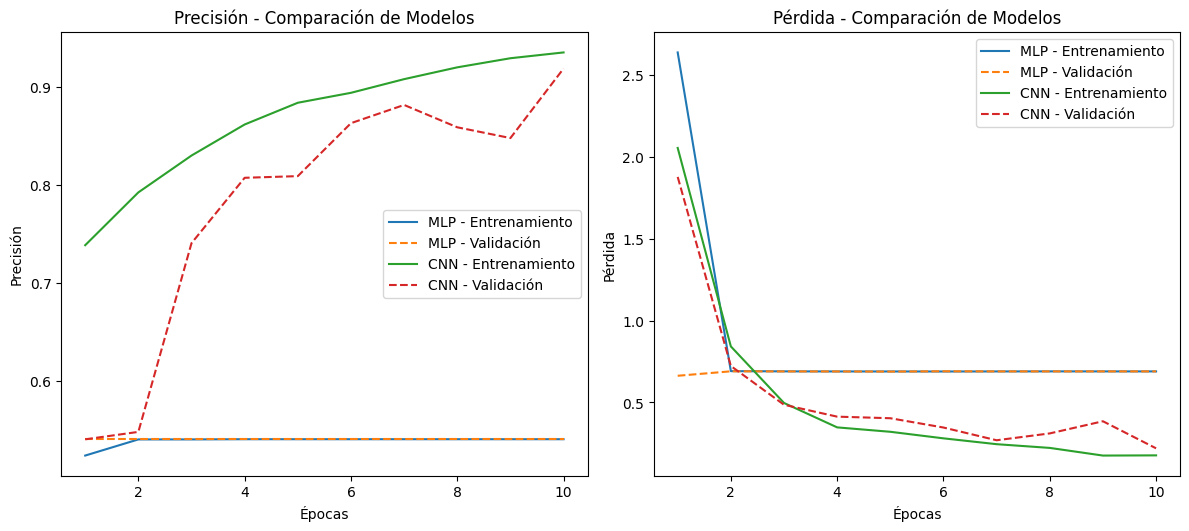

In [16]:
# Función para graficar las curvas de entrenamiento y validación separando las métricas por modelo
def plot_comparison_training_2x2(history_model1, history_model2, title1="Modelo 1", title2="Modelo 2"):
    # Extraer métricas para Modelo 1
    acc1 = history_model1.history['accuracy']
    val_acc1 = history_model1.history['val_accuracy']
    loss1 = history_model1.history['loss']
    val_loss1 = history_model1.history['val_loss']

    # Extraer métricas para Modelo 2
    acc2 = history_model2.history['accuracy']
    val_acc2 = history_model2.history['val_accuracy']
    loss2 = history_model2.history['loss']
    val_loss2 = history_model2.history['val_loss']

    # Generar los rangos de épocas
    epochs = range(1, len(acc1) + 1)

    # Crear figura con 2 filas y 2 columnas
    plt.figure(figsize=(12, 10))

    # Gráfico de precisión (entrenamiento y validación) para ambos modelos
    plt.subplot(2, 2, 1)
    plt.plot(epochs, acc1, label=f'{title1} - Entrenamiento', linestyle='-')
    plt.plot(epochs, val_acc1, label=f'{title1} - Validación', linestyle='--')
    plt.plot(epochs, acc2, label=f'{title2} - Entrenamiento', linestyle='-')
    plt.plot(epochs, val_acc2, label=f'{title2} - Validación', linestyle='--')
    plt.title('Precisión - Comparación de Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Gráfico de pérdida (entrenamiento y validación) para ambos modelos
    plt.subplot(2, 2, 2)
    plt.plot(epochs, loss1, label=f'{title1} - Entrenamiento', linestyle='-')
    plt.plot(epochs, val_loss1, label=f'{title1} - Validación', linestyle='--')
    plt.plot(epochs, loss2, label=f'{title2} - Entrenamiento', linestyle='-')
    plt.plot(epochs, val_loss2, label=f'{title2} - Validación', linestyle='--')
    plt.title('Pérdida - Comparación de Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Ajustar el diseño
    plt.tight_layout()
    plt.show()

# Graficar la comparación entre los modelos MLP y CNN
plot_comparison_training_2x2(mlp_history, cnn_history, title1="MLP", title2="CNN")



#### Evaluación practica de predicciones

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


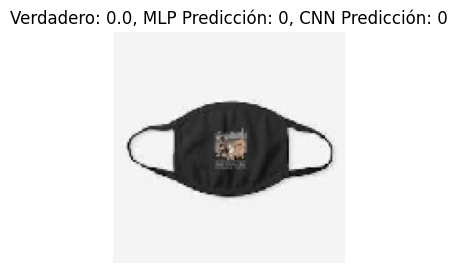

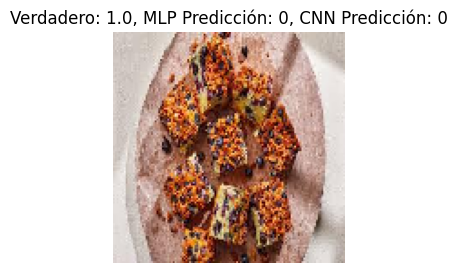

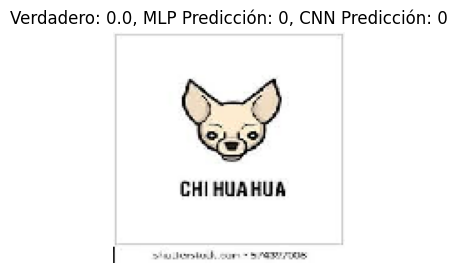

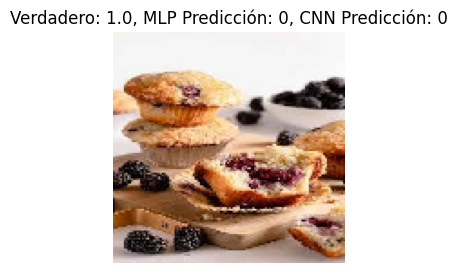

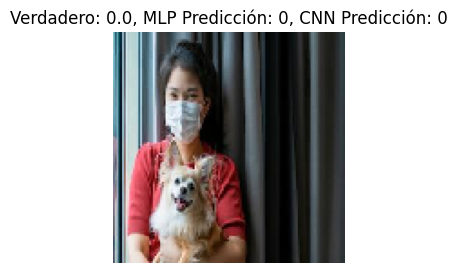

In [22]:
# Obtener las imágenes y las etiquetas verdaderas
images, labels = next(iter(test_data))

# Hacer predicciones sobre el batch de imágenes para los dos modelos
predictions_mlp = mlp_model.predict(images)
predictions_cnn = cnn_model.predict(images)

# Obtener las clases predichas
predicted_classes_mlp = np.argmax(predictions_mlp, axis=1)
predicted_classes_cnn = np.argmax(predictions_cnn, axis=1)

# Obtener las clases verdaderas del conjunto de prueba (sin np.argmax(), ya que labels es un vector unidimensional)
true_classes = labels  # Las etiquetas ya están como índices de clase

# Mostrar las primeras 5 imágenes con sus etiquetas verdaderas y predichas para ambos modelos
for i in range(5):
    plt.figure(figsize=(6, 3))
    
    # Asegurarse de que las imágenes estén en formato adecuado
    img = images[i]
    if img.max() <= 1:  # Si los valores están en el rango [0, 1], multiplicamos por 255
        img = (img * 255).astype(np.uint8)
    
    # Mostrar la imagen
    plt.imshow(img)
    
    # Título con las etiquetas para ambos modelos
    plt.title(f"Verdadero: {true_classes[i]}, MLP Predicción: {predicted_classes_mlp[i]}, CNN Predicción: {predicted_classes_cnn[i]}")
    
    plt.axis('off')  # Sin ejes
    plt.show()

Bajo las comparaciones realizadas fundamentadas en las metricas de evaluación de los modelos se puede concluir que la red CNN posee mayor predectividad respecto al objetivo de investigación

In [45]:
# Función para generar y visualizar la matriz de confusión como tabla
import pandas as pd
def plot_confusion_matrix_table(model, test_dataset, model_name="Modelo", max_batches=5):
    true_classes = []
    predicted_classes = []
    
    # Iterar sobre los datos de prueba
    for i, (images, labels) in enumerate(test_dataset):
        if i >= max_batches:  # Limitar a max_batches para optimización
            break

        # Hacer predicciones sobre el lote de imágenes
        predictions = model.predict(images, verbose=0)  # Predicción sin salida detallada
        predicted_classes.extend(np.argmax(predictions, axis=1))  # Acumular las predicciones
        
        # Si labels ya están codificados como enteros (0 o 1), no es necesario np.argmax
        true_classes.extend(labels)  # Acumular las etiquetas verdaderas (sin np.argmax)

    # Generar la matriz de confusión
    cm = confusion_matrix(true_classes, predicted_classes)

    # Convertir la matriz de confusión en un DataFrame de pandas
    cm_df = pd.DataFrame(cm, index=["Clase 0", "Clase 1"], columns=["Predicción 0", "Predicción 1"])

    # Mostrar la tabla de la matriz de confusión
    print(f"\nMatriz de Confusión - {model_name}")
    print(cm_df)

# Generar y mostrar las matrices de confusión para MLP y CNN
plot_confusion_matrix_table(mlp_model, test_data, model_name="MLP", max_batches=50)
plot_confusion_matrix_table(cnn_model, test_data, model_name="CNN", max_batches=50)


Matriz de Confusión - MLP
         Predicción 0  Predicción 1
Clase 0           851             0
Clase 1           749             0

Matriz de Confusión - CNN
         Predicción 0  Predicción 1
Clase 0           867             0
Clase 1           733             0


Dado los resultados, se puede analizar una segunda interación por que  el entrenamiento podria no haber sido lo suficientemente efectivo, podria estar presentando sobreajuste, se recomendaria balancear, aunque el desbalance de clases es  moderado, pero no extremo. 

Los modelo tienen dificultades para clasificar/predecir correctamente la clase 1


## 5. Conclusiones

Se detalla las principales conclusiones del proyecto, comenzando con una tabla que resume los dos modelos desarrollados: 

| **Características**               | **MLP**                                      | **CNN**                                   |
|-----------------------------------|----------------------------------------------|-------------------------------------------|
| **Número de Capas**               | 6 capas (incluyendo Dense y Dropout)         | 11 capas (incluyendo Conv2D, MaxPooling2D, BatchNormalization y Dense) |
| **Tipo de Capa Principal**        | Capas Densas                                 | Capas Convolucionales y Densas            |
| **Regularización**                | Dropout (30%)                                | Dropout (50%) y BatchNormalization        |
| **Enfoque Principal**             | Clasificación a partir de características vectoriales | Clasificación a partir de características espaciales (imágenes) |
| **Parámetros (Modelo Completo)**  | 12,583,168                                   | 6,531,512                                 |
| **Operación Principal**           | Conexiones densas entre neuronas             | Extracción de características espaciales seguida de clasificación |

  
En resumen respecto al diseño, el modelo MLP es más simple y directo, ideal para tareas donde las imágenes ya están preprocesadas en vectores. El modelo CNN, por otro lado, es más adecuado para la clasificación de imágenes en bruto, aprovechando las capas convolucionales para extraer características espaciales de la imagen. En general, el modelo CNN tiene más capacidad para aprender de datos complejos como imágenes, mientras que el MLP es más eficiente en tareas de clasificación con datos preprocesados.

La arquitectura del  modelo CNN utiliza un mayor cantidad de capas para el entrenamiento y maneja con mayor eficacia el sobreajuste mediante el dropout

# Revisar Mañana:

umbral de decisión puede hacer que el modelo sea más sensible a la clase 1.

Técnicas de balanceo de clases y aumento de datos pueden ser útiles si el desbalance sigue siendo un problema.

Evaluar con precisión, recuperación y F1-score es clave para entender el rendimiento real en cada clase.